### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Graph display

%matplotlib inline

In [3]:
# Define filepath

file_path = '/Users/daphne/Downloads/DY_6.1/Prepared Data/DY_Chocolate_Ratings_clean1.xlsx'

In [4]:
# Import file

df = pd.read_excel(file_path)

In [5]:
df.head(15)

,Company \n(Maker-if known),Specific Bean Origin,Reference #,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


### Data prep for regression analysis 

In [6]:
# Create subset for visualization

columns_for_visualization = ['Cocoa Percent', 'Rating']
df_subset = df[columns_for_visualization].copy()

In [7]:
# Removing % from 'Cocoa Percent' so it can be treated at numeric

df_subset['Cocoa Percent'] = df_subset['Cocoa Percent'].str.rstrip('%').astype('float')

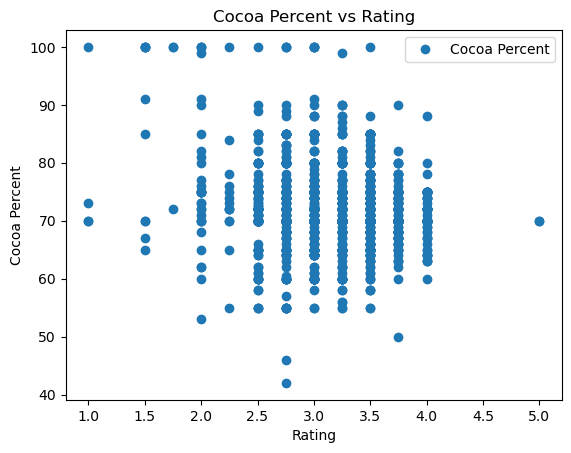

In [8]:
# Create a scatterplot using matplotlib 

df_subset.plot(x='Rating', y='Cocoa Percent', style='o')
plt.title('Cocoa Percent vs Rating')
plt.xlabel('Rating')
plt.ylabel('Cocoa Percent')
plt.show()

### Hypothesis

The cocoa percent of a chocolate bar does not change or affect the rating of the chocolate bar.

### Reshape the variables into NumPy arrays

In [9]:
# Reshape the variables

X = df_subset['Rating'].values.reshape(-1,1)
y = df_subset['Cocoa Percent'].values.reshape(-1,1)

In [10]:
X

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [11]:
y

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]])

### Split the data into two sets

In [12]:
# Split data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear regression

In [13]:
# Create regression object

regression = LinearRegression()

print(regression)

LinearRegression()


In [14]:
# Fit regression object to training data

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict some y values

y_predicted = regression.predict(X_test)

### Plot that shows the regression line on the test set

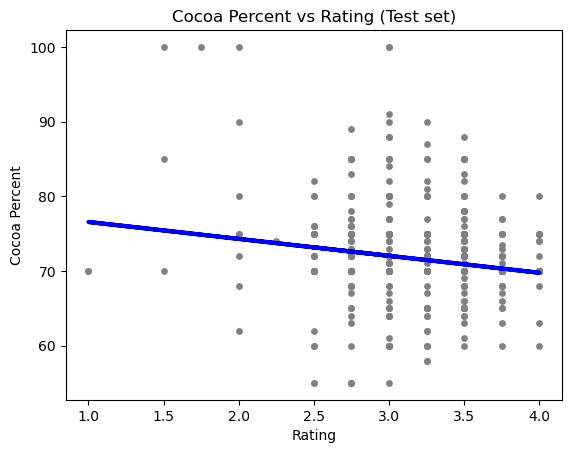

In [16]:
# Plot that shows regression line

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Rating')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

Its hard to tell how well the line appears to fit the data because there isn't an obvious pattern between the 2 variables. It looks somewhat accurate to me. By just looking at this plot, it seems like as the ratings go up the cocoa percent goes down.

### MSE and R2 score.

In [17]:
# Create objects with summary statistics

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [18]:
# Print summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.26797133]]
Mean squared error:  37.84542287249988
R2 score:  0.018328240626935166


### Compare predicted y values with actual y values

In [21]:
# Create a df to compare predicted y values with actual y values

df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_compare.head(25)

,Actual,Predicted
0,75.0,73.155133
1,72.0,72.588141
2,70.0,73.155133
3,70.0,71.454155
4,80.0,71.454155
5,55.0,72.588141
6,70.0,70.887162
7,75.0,73.155133
8,66.0,70.887162
9,65.0,70.887162


The slope is negative which indicates a negative relationship between the variables, this shows that as 'Ratings' rise, 'Cocoa Percent' drops. This is understandable, I noticed this when observing the regression line plot I made. The MSE is high (37.85), meaning a regression model may not be appropriate and accurate for the data. The R2 score, also shows that the model is not a good fit for this data. Looking at the data frame above, (especially the last two rows- 23 and 24) it is obvious that the predictions are far from the actual values. Overall, I would say that the model is not a good fit for this data. I also still stand by my hypothesis previouly made in this notebook--The cocoa percent of a chocolate bar does not change or affect the rating of the chocolate bar.